# ***浅层神经网络***

# 1. 神经网络概述

① 前面的课程中，我们已经使用计算图的方式介绍了逻辑回归梯度下降算法的正向传播和反向传播两个过程。

② 神经网络的结构与逻辑回归类似，只是神经网络的层数比逻辑回归多一层，多出来的中间那层称为隐藏层或中间层。

③ 这样从计算上来说，神经网络的正向传播和反向传播过程只是比逻辑回归多了一次重复的计算。正向传播过程分成两层，第一层是输入层到隐藏层，用上标[1]来表示。

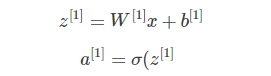

④ 第二层是隐藏层到输出层，用上标[2]来表示：

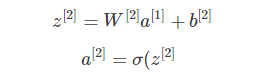

⑤ 在写法上值得注意的是，方括号上标[i]表示当前所处的层数；圆括号上标(i)表示第i个样本。

① 同样，反向传播过程也分成两层。第一层是输出层到隐藏层，第二层是隐藏层到输入层。其细节部分我们之后再来讨论。

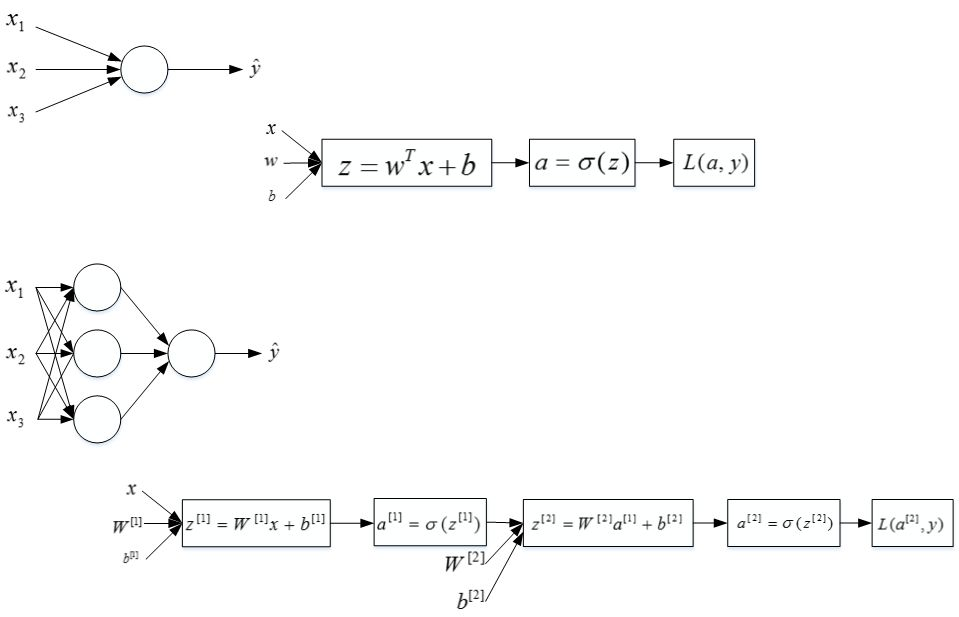

# 2. 浅层神经网络

① 下面我们以图示的方式来介绍单隐藏层的神经网络结构。

② 如下图所示，单隐藏层神经网络就是典型的浅层（shallow）神经网络。

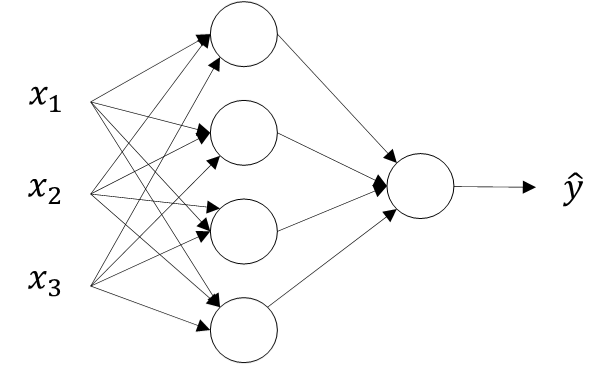

① 结构上，从左到右，可以分成三层：输入层（Input layer），隐藏层（Hidden layer）和输出层（Output layer）。

② 输入层和输出层，顾名思义，对应着训练样本的输入和输出，很好理解。

③ 隐藏层是抽象的非线性的中间层，这也是其被命名为隐藏层的原因。

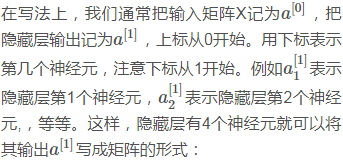

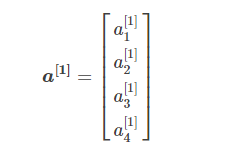

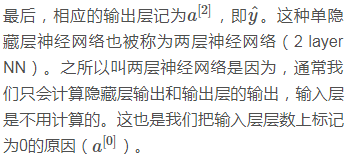

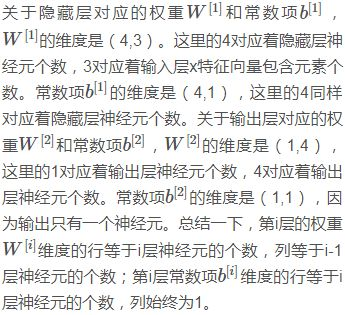

# 3. 计算神经网络输出

① 接下来我们开始详细推导神经网络的计算过程。

② 回顾一下，我们前面讲过两层神经网络可以看成是逻辑回归再重复计算一次。如下图所示，逻辑回归的正向计算可以分解成计算z和a的两部分：

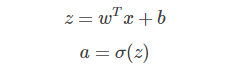

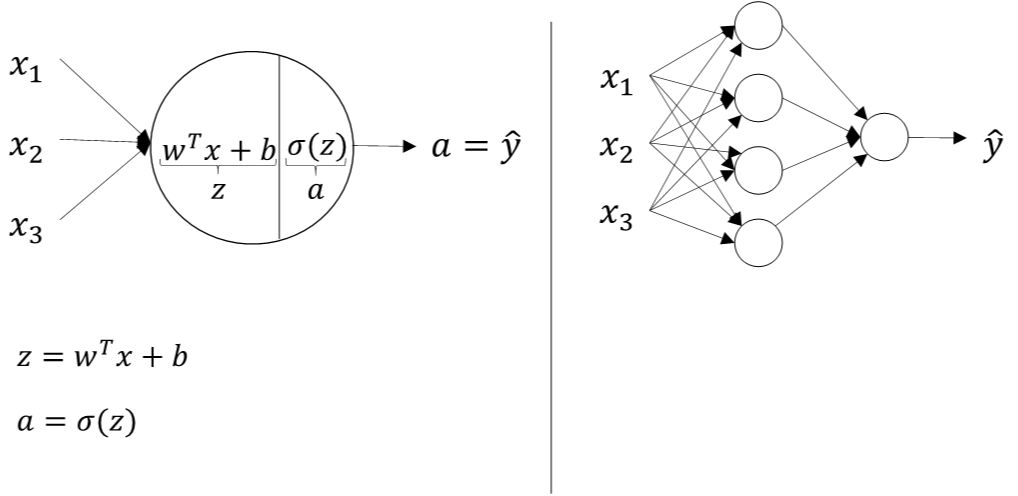

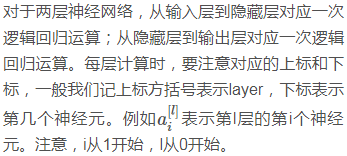

③ 下面，我们将从输入层到输出层的计算公式列出来：

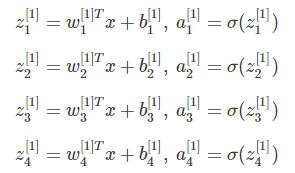

④ 然后，从隐藏层到输出层的计算公式为：

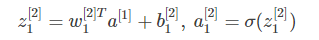

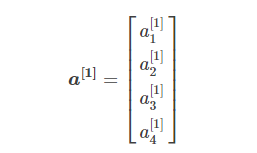

⑤ 上述每个节点的计算都对应着一次逻辑运算的过程，分别由计算z和a两部分组成。

⑥ 为了提高程序运算速度，我们引入向量化和矩阵运算的思想，将上述表达式转换成矩阵运算的形式：

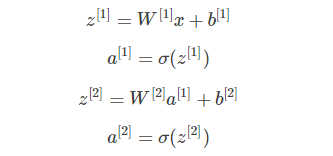

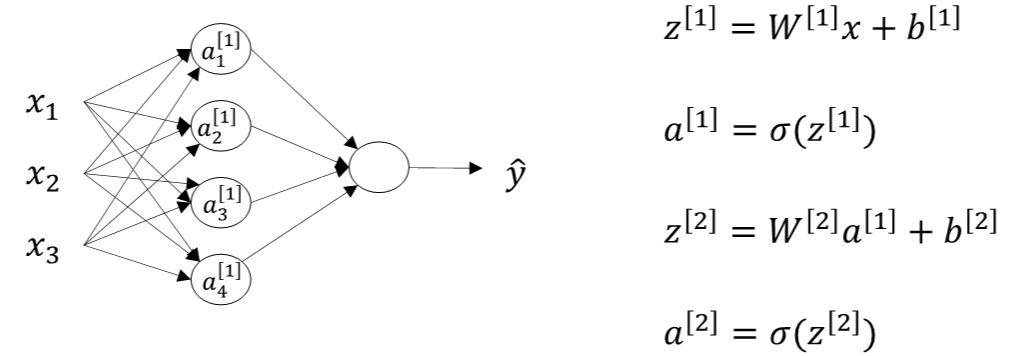

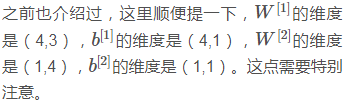

# 4. 矩阵运算

① 上一部分我们只是介绍了单个样本的神经网络正向传播矩阵运算过程。

② 而对于m个训练样本，我们也可以使用矩阵相乘的形式来提高计算效率。

③ 而且它的形式与上一部分单个样本的矩阵运算十分相似，比较简单。

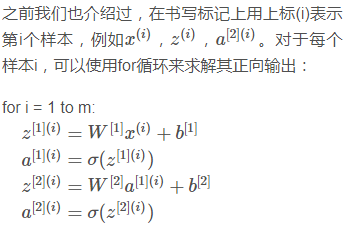

④ 不使用for循环，利用矩阵运算的思想，输入矩阵X的维度为（$n_x$,m）。这样，我们可以把上面的for循环写成矩阵运算的形式：

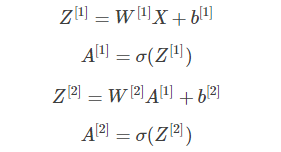

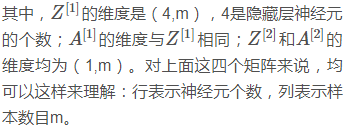

⑤ 这部分Andrew用图示的方式解释了m个样本的神经网络矩阵运算过程。

⑥ 其实内容比较简单，只要记住上述四个矩阵的行表示神经元个数，列表示样本数目m就行了。

# 5. 非线性激活函数

① 我们知道上一部分讲的四种激活函数都是非线性（non-linear）的。那是否可以使用线性激活函数呢？答案是不行！下面我们就来进行简要的解释和说明。

② 假设所有的激活函数都是线性的，为了简化计算，我们直接令激活函数g(z)=z，即a=z。那么，浅层神经网络的各层输出为：

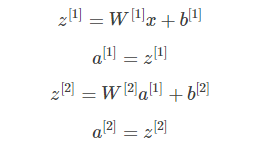

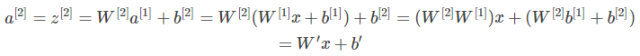

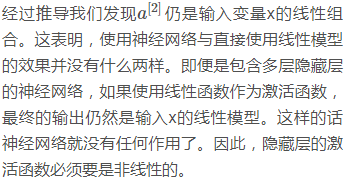

③ 另外，如果所有的隐藏层全部使用线性激活函数，只有输出层使用非线性激活函数，那么整个神经网络的结构就类似于一个简单的逻辑回归模型，而失去了神经网络模型本身的优势和价值。

④ 值得一提的是，如果是预测问题而不是分类问题，输出y是连续的情况下，输出层的激活函数可以使用线性函数。如果输出y恒为正值，则也可以使用ReLU激活函数，具体情况，具体分析。

# 6. 激活函数梯度计算

① 接下来看一下在神经网络中如何进行梯度计算。

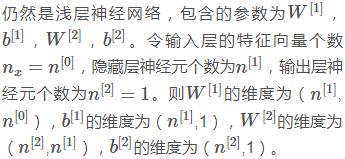

② 该神经网络正向传播过程为：

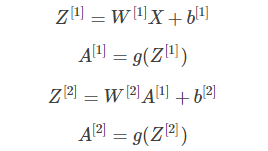

③ 其中，g(⋅)表示激活函数。

④ 反向传播是计算导数（梯度）的过程，这里先列出来Cost function对各个参数的梯度：

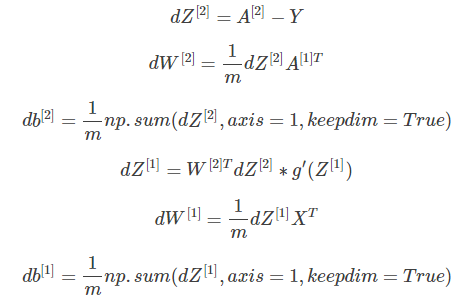

⑤ 反向传播的具体推导过程我们下一部分再进行详细说明。

# 7. 反向传播

① 我们仍然使用计算图的方式来推导神经网络反向传播过程。记得之前介绍逻辑回归时，我们就引入了计算图来推导正向传播和反向传播，其过程如下图所示：

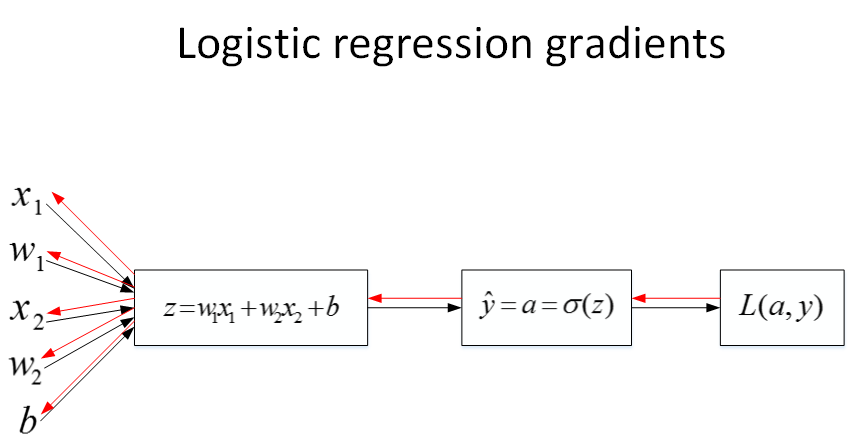

② 由于多了一个隐藏层，神经网络的计算图要比逻辑回归的复杂一些，如下图所示。对于单个训练样本，正向过程很容易，反向过程可以根据梯度计算方法逐一推导。

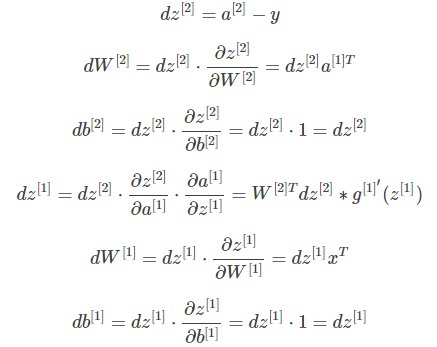

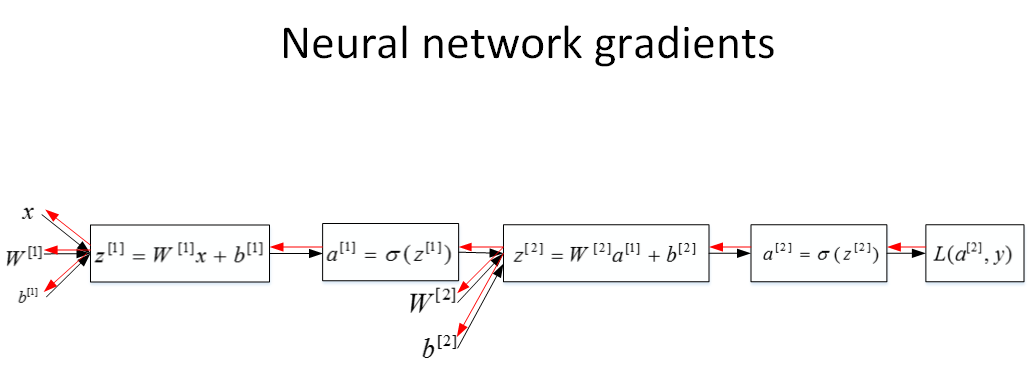

③ 总结一下，浅层神经网络（包含一个隐藏层），m个训练样本的正向传播过程和反向传播过程分别包含了6个表达式，其向量化矩阵形式如下图所示：

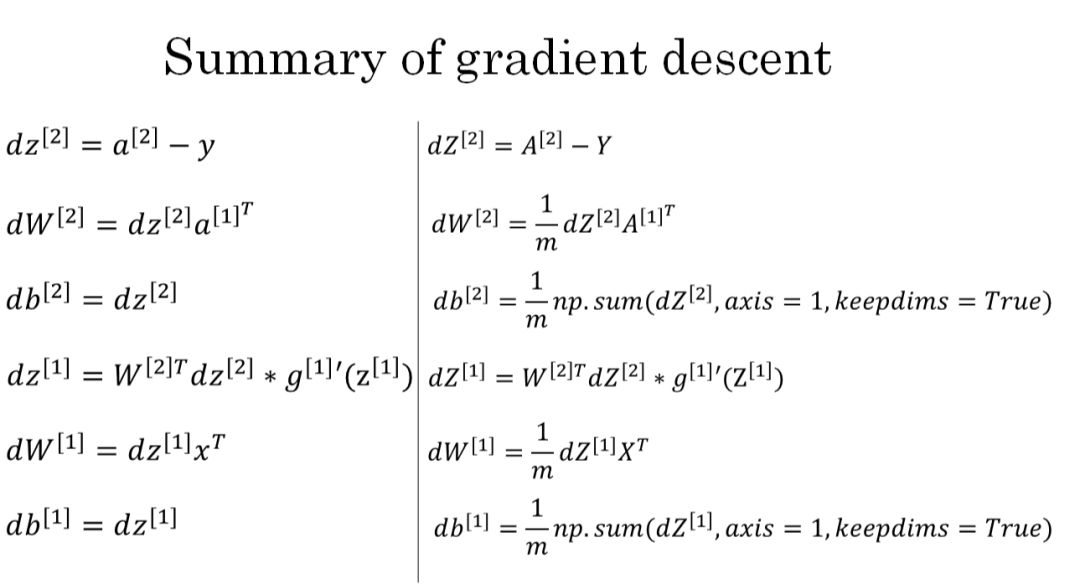

# 8. 随即初始化

① 神经网络模型中的参数权重W是不能全部初始化为零的，接下来我们分析一下原因。

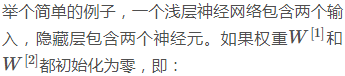

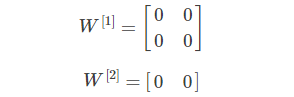

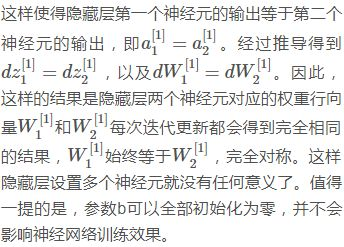

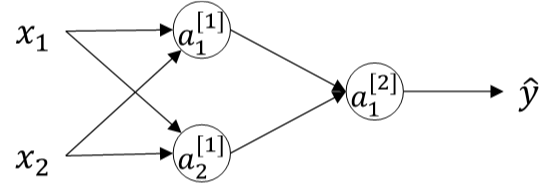

② 我们把这种权重W全部初始化为零带来的问题称为symmetry breaking problem。解决方法也很简单，就是将W进行随机初始化（b可初始化为零）。python里可以使用如下语句进行W和b的初始化：

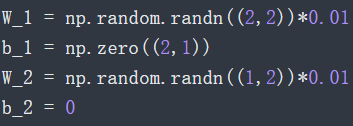

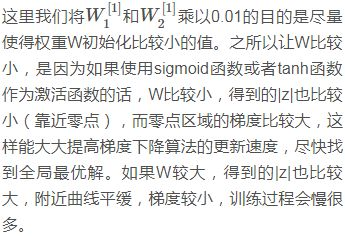

③ 当然，如果激活函数是ReLU或者Leaky ReLU函数，则不需要考虑这个问题。但是，如果输出层是sigmoid函数，则对应的权重W最好初始化到比较小的值。

# 9. 总结

① 本节课主要介绍了浅层神经网络。

② 首先，我们简单概述了神经网络的结构：包括输入层，隐藏层和输出层。

③ 然后，我们以计算图的方式推导了神经网络的正向输出，并以向量化的形式归纳出来。

④ 接着，介绍了不同的激活函数并做了比较，实际应用中根据不同需要选择合适的激活函数。

⑤ 激活函数必须是非线性的，不然神经网络模型起不了任何作用。

⑥ 然后，我们重点介绍了神经网络的反向传播过程以及各个参数的导数推导，并以矩阵形式表示出来。

⑦ 最后，介绍了权重随机初始化的重要性，必须对权重W进行随机初始化操作。